# 初始化

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

conf = SparkConf().setAppName("SpamSmsWorkflow").setMaster("yarn")
spark = SparkSession.builder.config(conf=conf).getOrCreate()
spark  

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/21 14:15:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/21 14:15:25 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


put: `/user/jupyter/data/spam_sms_raw/train.xlsx': File exists


256

# 数据可视化

=== 原始数据基础信息 ===


25/10/21 14:30:30 WARN TaskSetManager: Stage 84 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


+-------+------------------+-------------------------------------+------------------+
|summary|                id|                                 text|             label|
+-------+------------------+-------------------------------------+------------------+
|  count|            400000|                               400000|            400000|
|   mean|          199999.5|                                  NaN|         0.1000675|
| stddev|115470.19817540224|                                  NaN|0.3000903540257545|
|    min|                 0|    !!!大大喜事啦…金源燕莎一层化妆...|                 0|
|    max|            399999|￥缩紧，用钱提前储备，深房最高十成...|                 1|
+-------+------------------+-------------------------------------+------------------+



25/10/21 14:30:37 WARN TaskSetManager: Stage 87 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.
25/10/21 14:30:38 WARN TaskSetManager: Stage 90 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.
25/10/21 14:30:44 WARN TaskSetManager: Stage 93 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.
25/10/21 14:30:45 WARN TaskSetManager: Stage 96 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


- 无缺失值

=== 标签分布 ===


25/10/21 14:30:55 WARN TaskSetManager: Stage 97 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


+-----+------+------+
|label| count| ratio|
+-----+------+------+
|    0|359973|0.8999|
|    1| 40027|0.1001|
+-----+------+------+


=== 文本长度分布 ===


25/10/21 14:30:56 WARN TaskSetManager: Stage 102 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.
25/10/21 14:30:57 WARN TaskSetManager: Stage 105 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


+-----+------------------+----------+--------+
|label|          平均长度|中位数长度|最大长度|
+-----+------------------+----------+--------+
|    0|21.152069738563725|        18|     118|
|    1| 65.78259674719564|        67|     488|
+-----+------------------+----------+--------+



25/10/21 14:30:58 WARN TaskSetManager: Stage 106 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


PySparkTypeError: [NOT_COLUMN_OR_STR] Argument `col` should be a Column or str, got Series.

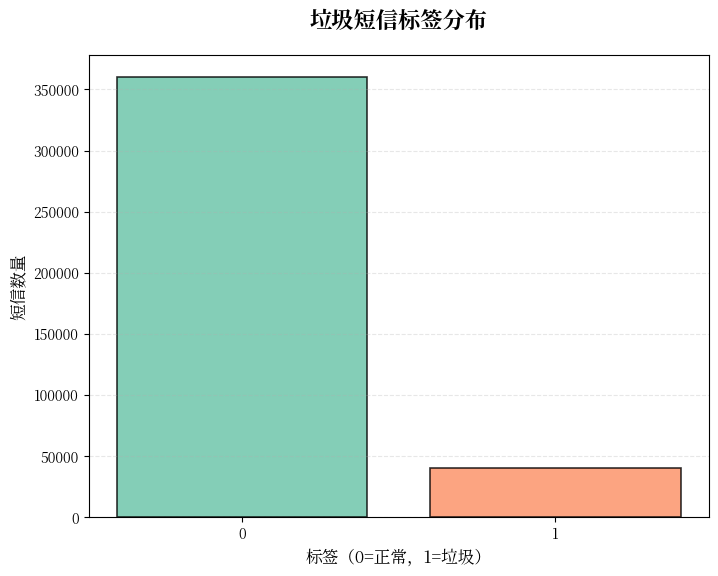

# 数据清洗及导入

字段名： ['id', 'text', 'label']


25/10/21 14:38:50 WARN TaskSetManager: Stage 141 contains a task of very large size (15861 KiB). The maximum recommended task size is 1000 KiB.


Found 3 items
-rw-r--r--   3 jupyter hadoop          0 2025-10-21 14:38 /user/jupyter/data/spam_sms_cleaned/_SUCCESS
-rw-r--r--   3 jupyter hadoop   12184931 2025-10-21 14:38 /user/jupyter/data/spam_sms_cleaned/part-00000-2aea28c5-d9d6-434f-835b-09c006f39a76-c000.snappy.parquet
-rw-r--r--   3 jupyter hadoop   12307064 2025-10-21 14:38 /user/jupyter/data/spam_sms_cleaned/part-00001-2aea28c5-d9d6-434f-835b-09c006f39a76-c000.snappy.parquet


0

# 特征工程

开始特征工程处理
数据加载完成，共 396156 条记录

构建文本特征提取流水线

开始特征提取...


文本特征提取完成
   添加文本长度特征
 组合TF-IDF特征和文本长度特征
特征组合完成

特征工程结果验证
----------------------------------------
处理后的数据样例:


25/10/21 14:44:34 WARN DAGScheduler: Broadcasting large task binary with size 1085.5 KiB


-RECORD 0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 label             | 0                                                                                                                                                                                       
 text              | xxxx年x月xx日由镇统战组织去上海展览中心参观“中国梦同舟行”统战实物照片展                                                                                                                 
 combined_features | (65537,[43623,65536],[11.097806407083686,40.0])                                                                                                                                         
 text_length       | 40                                                                                                                                                                                      
-

25/10/21 14:44:34 WARN DAGScheduler: Broadcasting large task binary with size 1081.7 KiB



特征向量维度: 65537

数据统计摘要:
总样本数: 396156
特征列: combined_features
标签分布:
+-----+------+
|label| count|
+-----+------+
|    0|356465|
|    1| 39691|
+-----+------+


 特征工程流水线总结
成功构建的特征:
  1. 文本分词 → 停用词过滤 → TF-IDF特征
  2. 文本长度特征
  3. 组合特征向量 (TF-IDF + 文本长度)

最终特征维度: 65537
特征工程处理 


数据准备与划分


25/10/21 14:50:52 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:50:56 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB


训练集样本数: 277,161


测试集样本数: 118,995

----------------------------------------
数据平衡处理
----------------------------------------


25/10/21 14:50:59 WARN DAGScheduler: Broadcasting large task binary with size 4.8 MiB


过采样后训练集样本数: 332,871

----------------------------------------
模型配置
----------------------------------------
模型配置完成
特征列: combined_features
标签列: label

----------------------------------------
模型训练与评估
----------------------------------------
训练逻辑回归模型...


25/10/21 14:51:15 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/10/21 14:51:18 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:20 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:21 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:21 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:21 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:22 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:22 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:22 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:23 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 14:51:23 WARN DAGSchedul

逻辑回归模型 F1 分数: 0.9325
训练梯度提升树模型...


25/10/21 14:52:11 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB
25/10/21 14:52:12 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB
25/10/21 14:52:20 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
25/10/21 14:52:37 WARN DAGScheduler: Broadcasting large task binary with size 5.9 MiB
25/10/21 14:55:37 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_523_0 !
25/10/21 14:55:55 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 2 for reason Container from a bad node: container_1761027187948_0001_01_000003 on host: hadoop03. Exit status: 137. Diagnostics: [2025-10-21 14:55:40.483]Container killed on request. Exit code is 137
[2025-10-21 14:55:40.494]Container exited with a non-zero exit code 137. 
[2025-10-21 14:55:40.679]Killed by external signal
.
25/10/21 14:55:55 ERROR YarnScheduler: Lost executor 2 on hadoop03: Container from a bad node: container_1761027187948_0001_01_0000

KeyboardInterrupt: 

25/10/21 17:30:10 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:30:32 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB


训练集样本数: 277,161


25/10/21 17:32:23 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB


测试集样本数: 118,995

----------------------------------------
模型配置
----------------------------------------
模型配置完成
特征列: combined_features
标签列: label
使用模型: 逻辑回归

----------------------------------------
模型训练与评估
----------------------------------------
训练逻辑回归模型...


25/10/21 17:32:28 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:32:31 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:32:34 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:32:34 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:32:35 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB
25/10/21 17:32:35 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:34:25 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:34:28 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:34:28 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:34:57 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/10/21 17:34:58 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB
25/10/21 17:34:58 WARN DAGScheduler: Broadcasting larg

逻辑回归模型 F1 分数: 0.9325

最终结果
最优模型: 逻辑回归
测试集 F1 分数: 0.9325
建议: 逻辑回归模型训练完成，可直接用于垃圾短信识别

模型训练与评估完成


In [ ]:
逻辑回归模型 F1 分数: 0.9325

## 模型评估可视化

逻辑回归模型评估指标计算


25/10/21 17:43:12 WARN DAGScheduler: Broadcasting large task binary with size 5.2 MiB
25/10/21 17:43:56 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB



逻辑回归模型性能:
  准确率: 0.9349
  精确率: 0.7043
  召回率: 0.5961
  F1: 0.6457

----------------------------------------
生成混淆矩阵
----------------------------------------


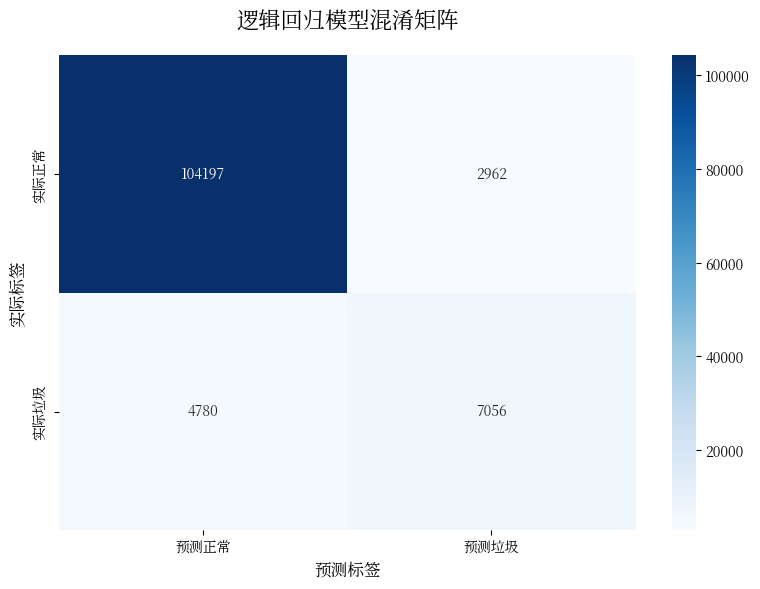


----------------------------------------
生成模型性能直方图
----------------------------------------


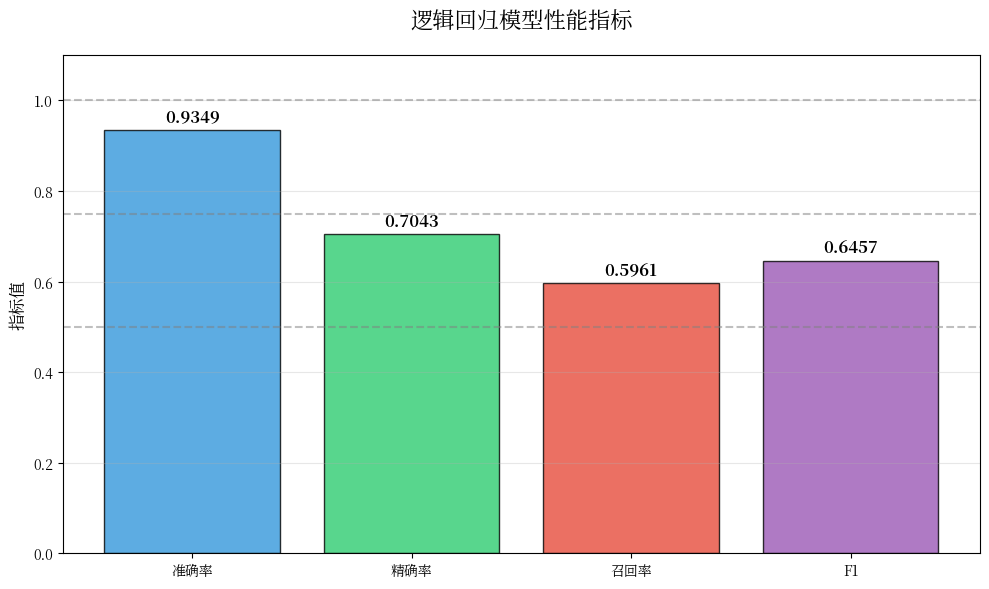


逻辑回归模型评估完成
可视化文件已保存至: ./data
  1. logistic_regression_confusion_matrix.png - 混淆矩阵
  2. logistic_regression_metrics.png - 模型性能直方图


25/10/21 17:48:54 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB
